[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# Train YOLOv8 Object Detection on a Custom Dataset

---


## Steps in this code

In this code, we are going to cover:
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Wed Aug  7 20:08:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

!pip install roboflow

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


/content/datasets
unzip:  cannot find or open wild-pig.v3i.yolov8.zip, wild-pig.v3i.yolov8.zip.zip or wild-pig.v3i.yolov8.zip.ZIP.


In [ ]:
# Manual steps
!unzip wild-pig.v3i.yolov8.zip datasets

## Custom Training

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="ytSX8BLQcKVW55xo70U9")
project = rf.workspace("subterraspace").project("wild-pig-mtqln")
version = project.version(3)
dataset = version.download("yolov8")



mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to wild-pig-3 in yolov8:: 100%|██████████| 88481/88481 [00:26<00:00, 3351.41it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True batch=32
#!yolo task=detect mode=train model=yolov8m.pt data={HOME}/datasets/data.yaml epochs=50 imgsz=640 plots=True batch=32

# Without define batch size
#!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

/content
100% 49.7M/49.7M [00:00<00:00, 289MB/s]
New https://pypi.org/project/ultralytics/8.2.74 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/wild-pig-3/data.yaml, epochs=50, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffe

In [ ]:
!zip master_model.zip -r {HOME}/runs/detect/train

  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 6%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 6%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 2%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 6%)
  adding: content/runs/detect/train/labels.jpg (deflated 33%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 5%)
  adding: content/runs/detect/train/P_curve.png (deflated 18%)
  adding: content/runs/detect/train/val_batch2_pred.jpg (deflated 6%)
  adding: content/runs/detect/train/train_batch53800.jpg (deflated 7%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 32%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 37%)
  adding: content/runs/detect/train/F1_curve.png (deflated 17%)
  adding: content/runs/detect/train/PR_curve.png (deflated 19%)
  adding: content/runs/detect/train/train_batch0.

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1723061468.6719a11250e0.1939.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	  val_batch2_pred.jpg
labels.jpg					    train_batch53800.jpg  weights
P_curve.png					    train_batch53801.jpg
PR_curve.png					    train_batch53802.jpg


/content


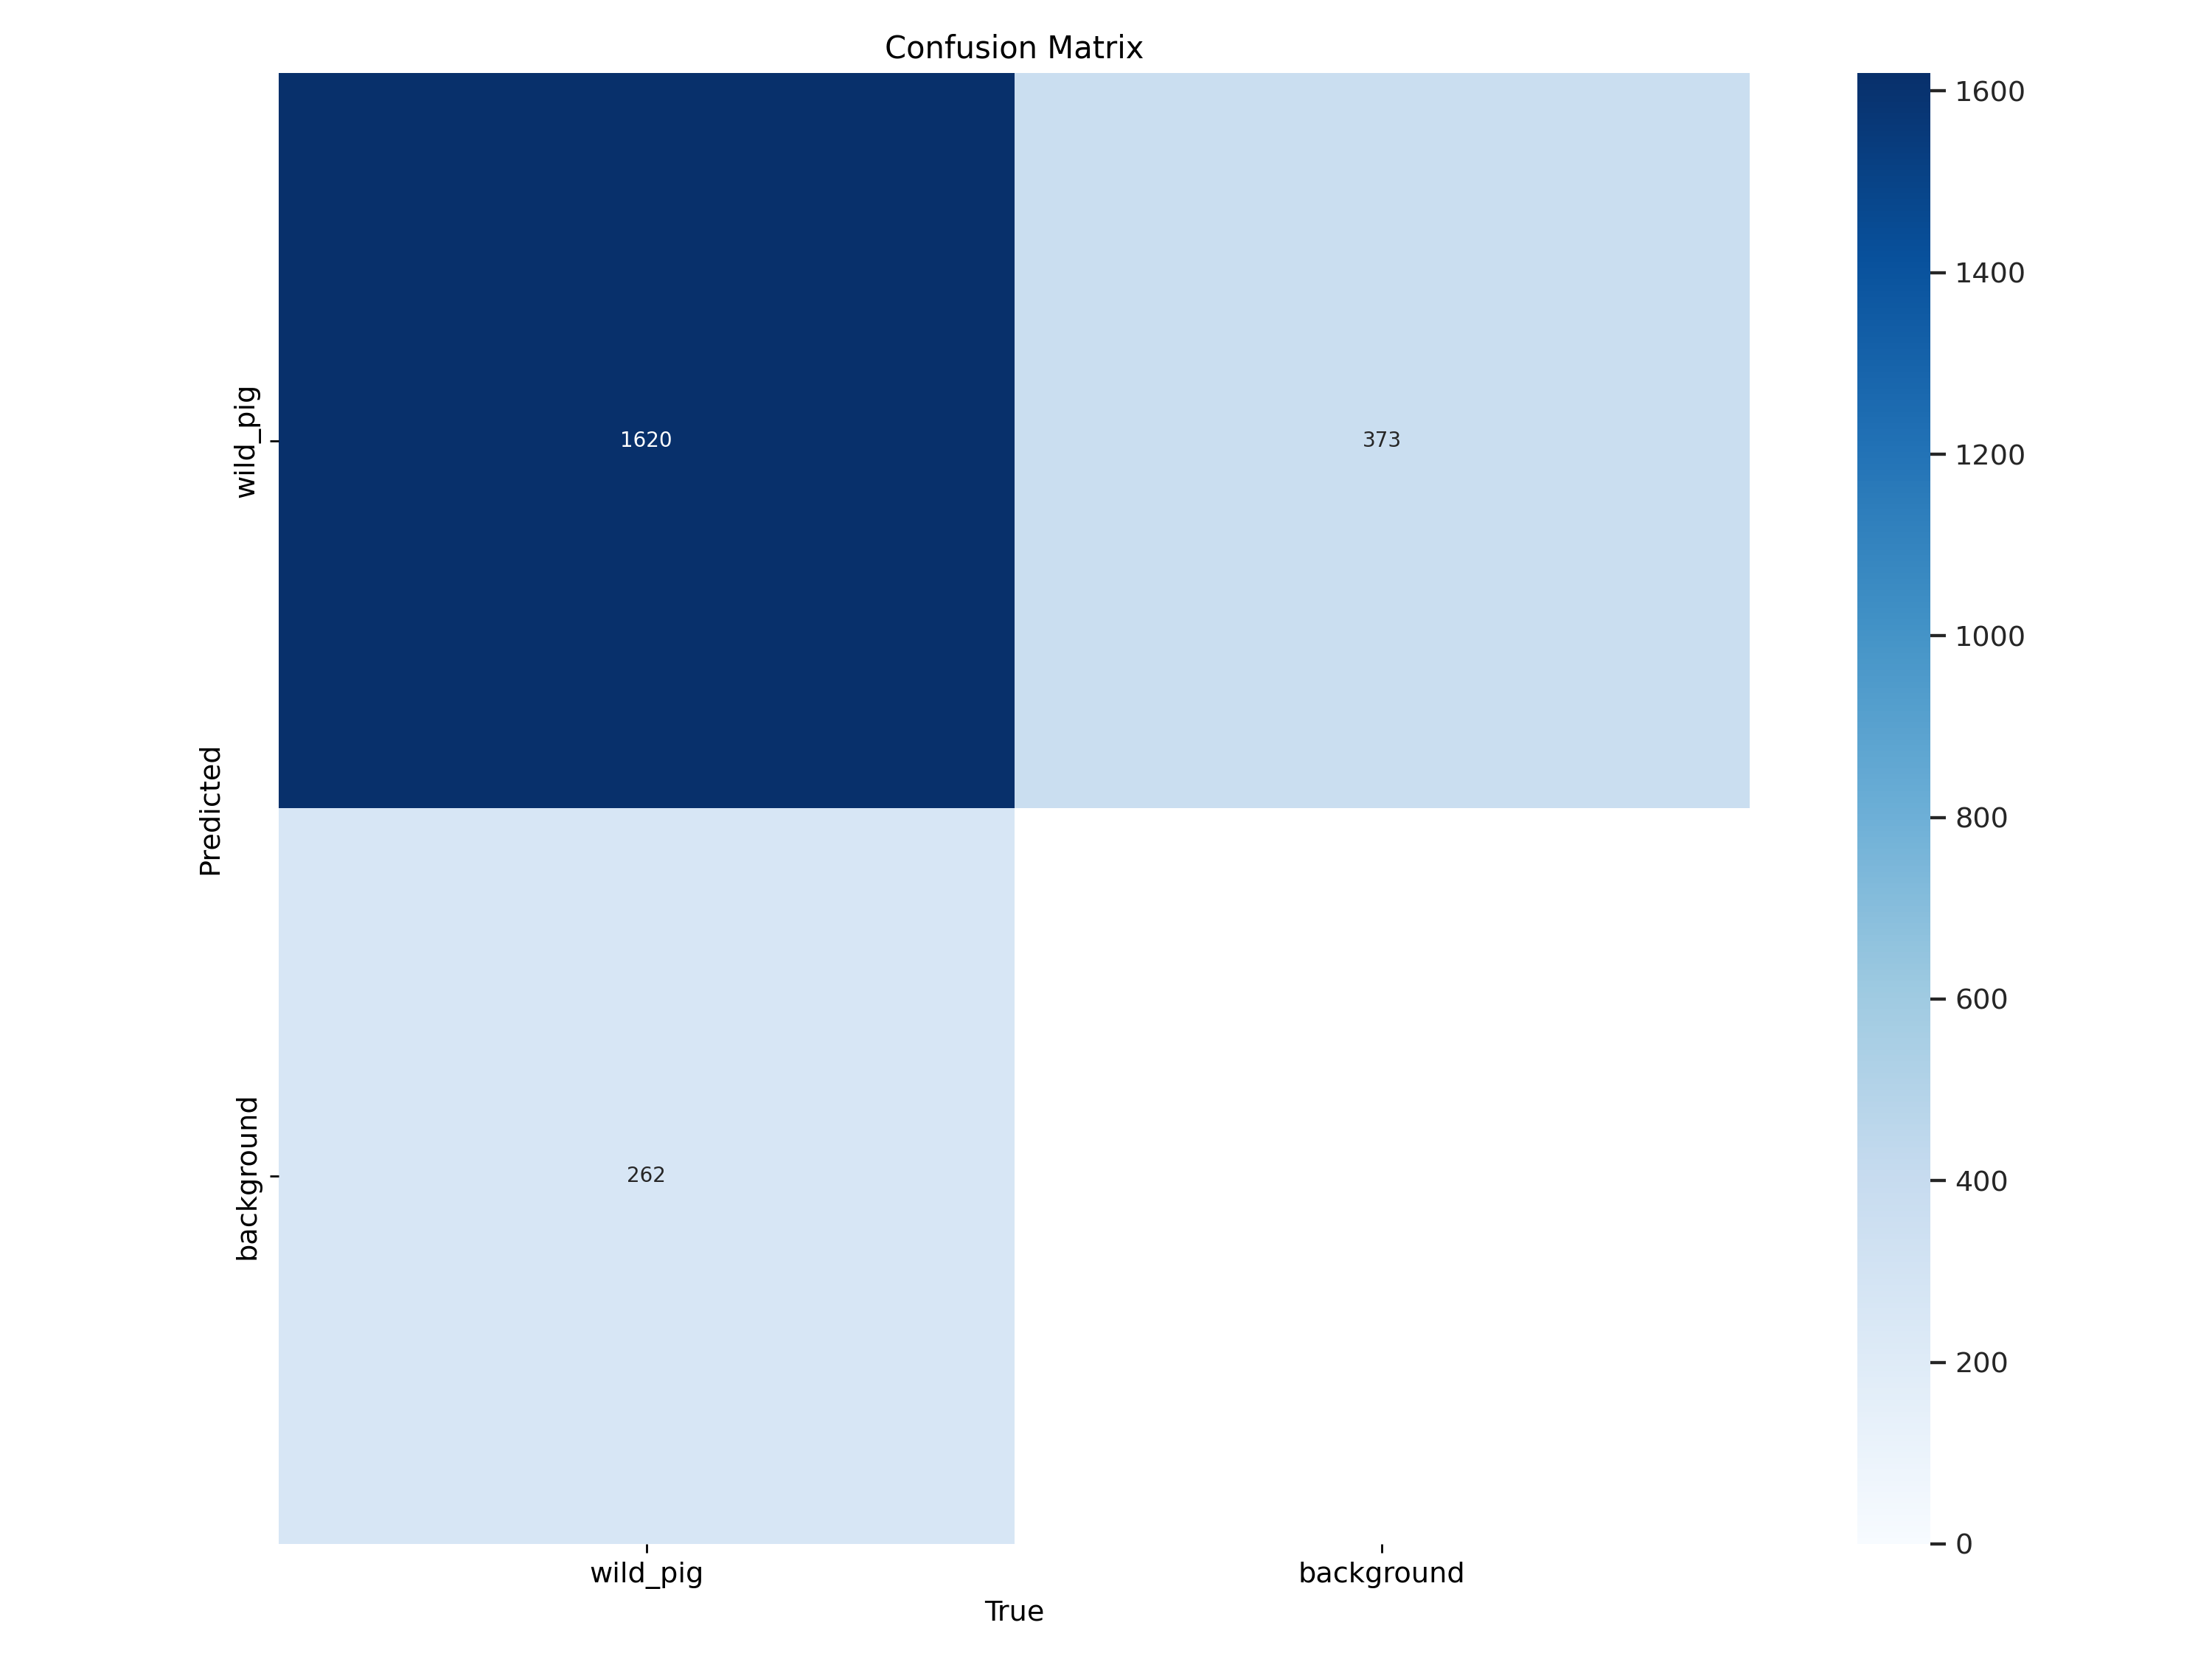

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


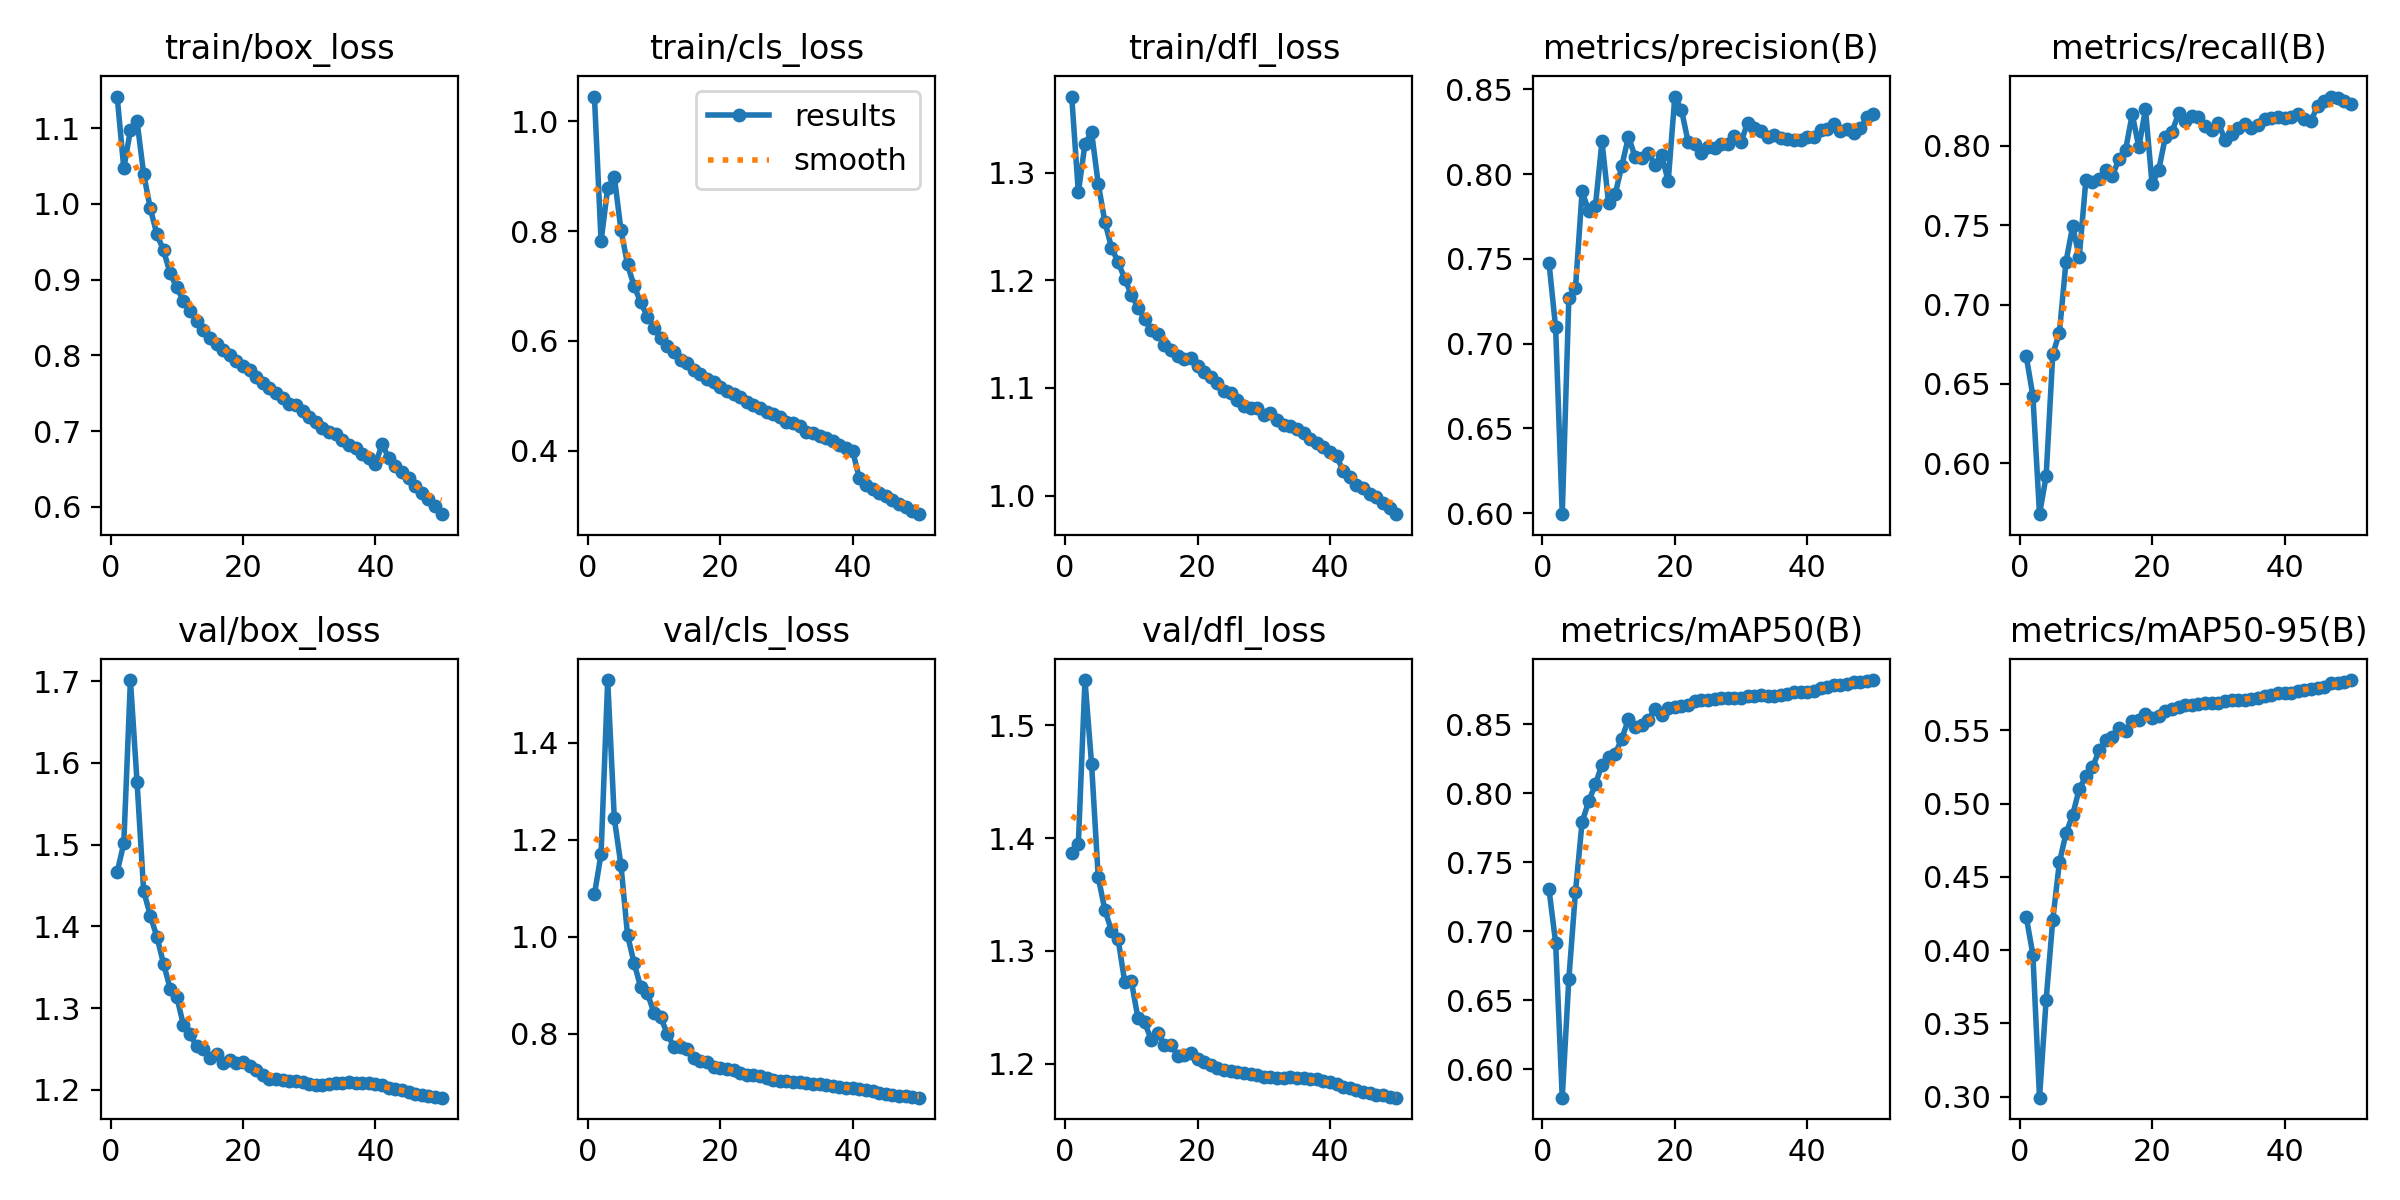

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


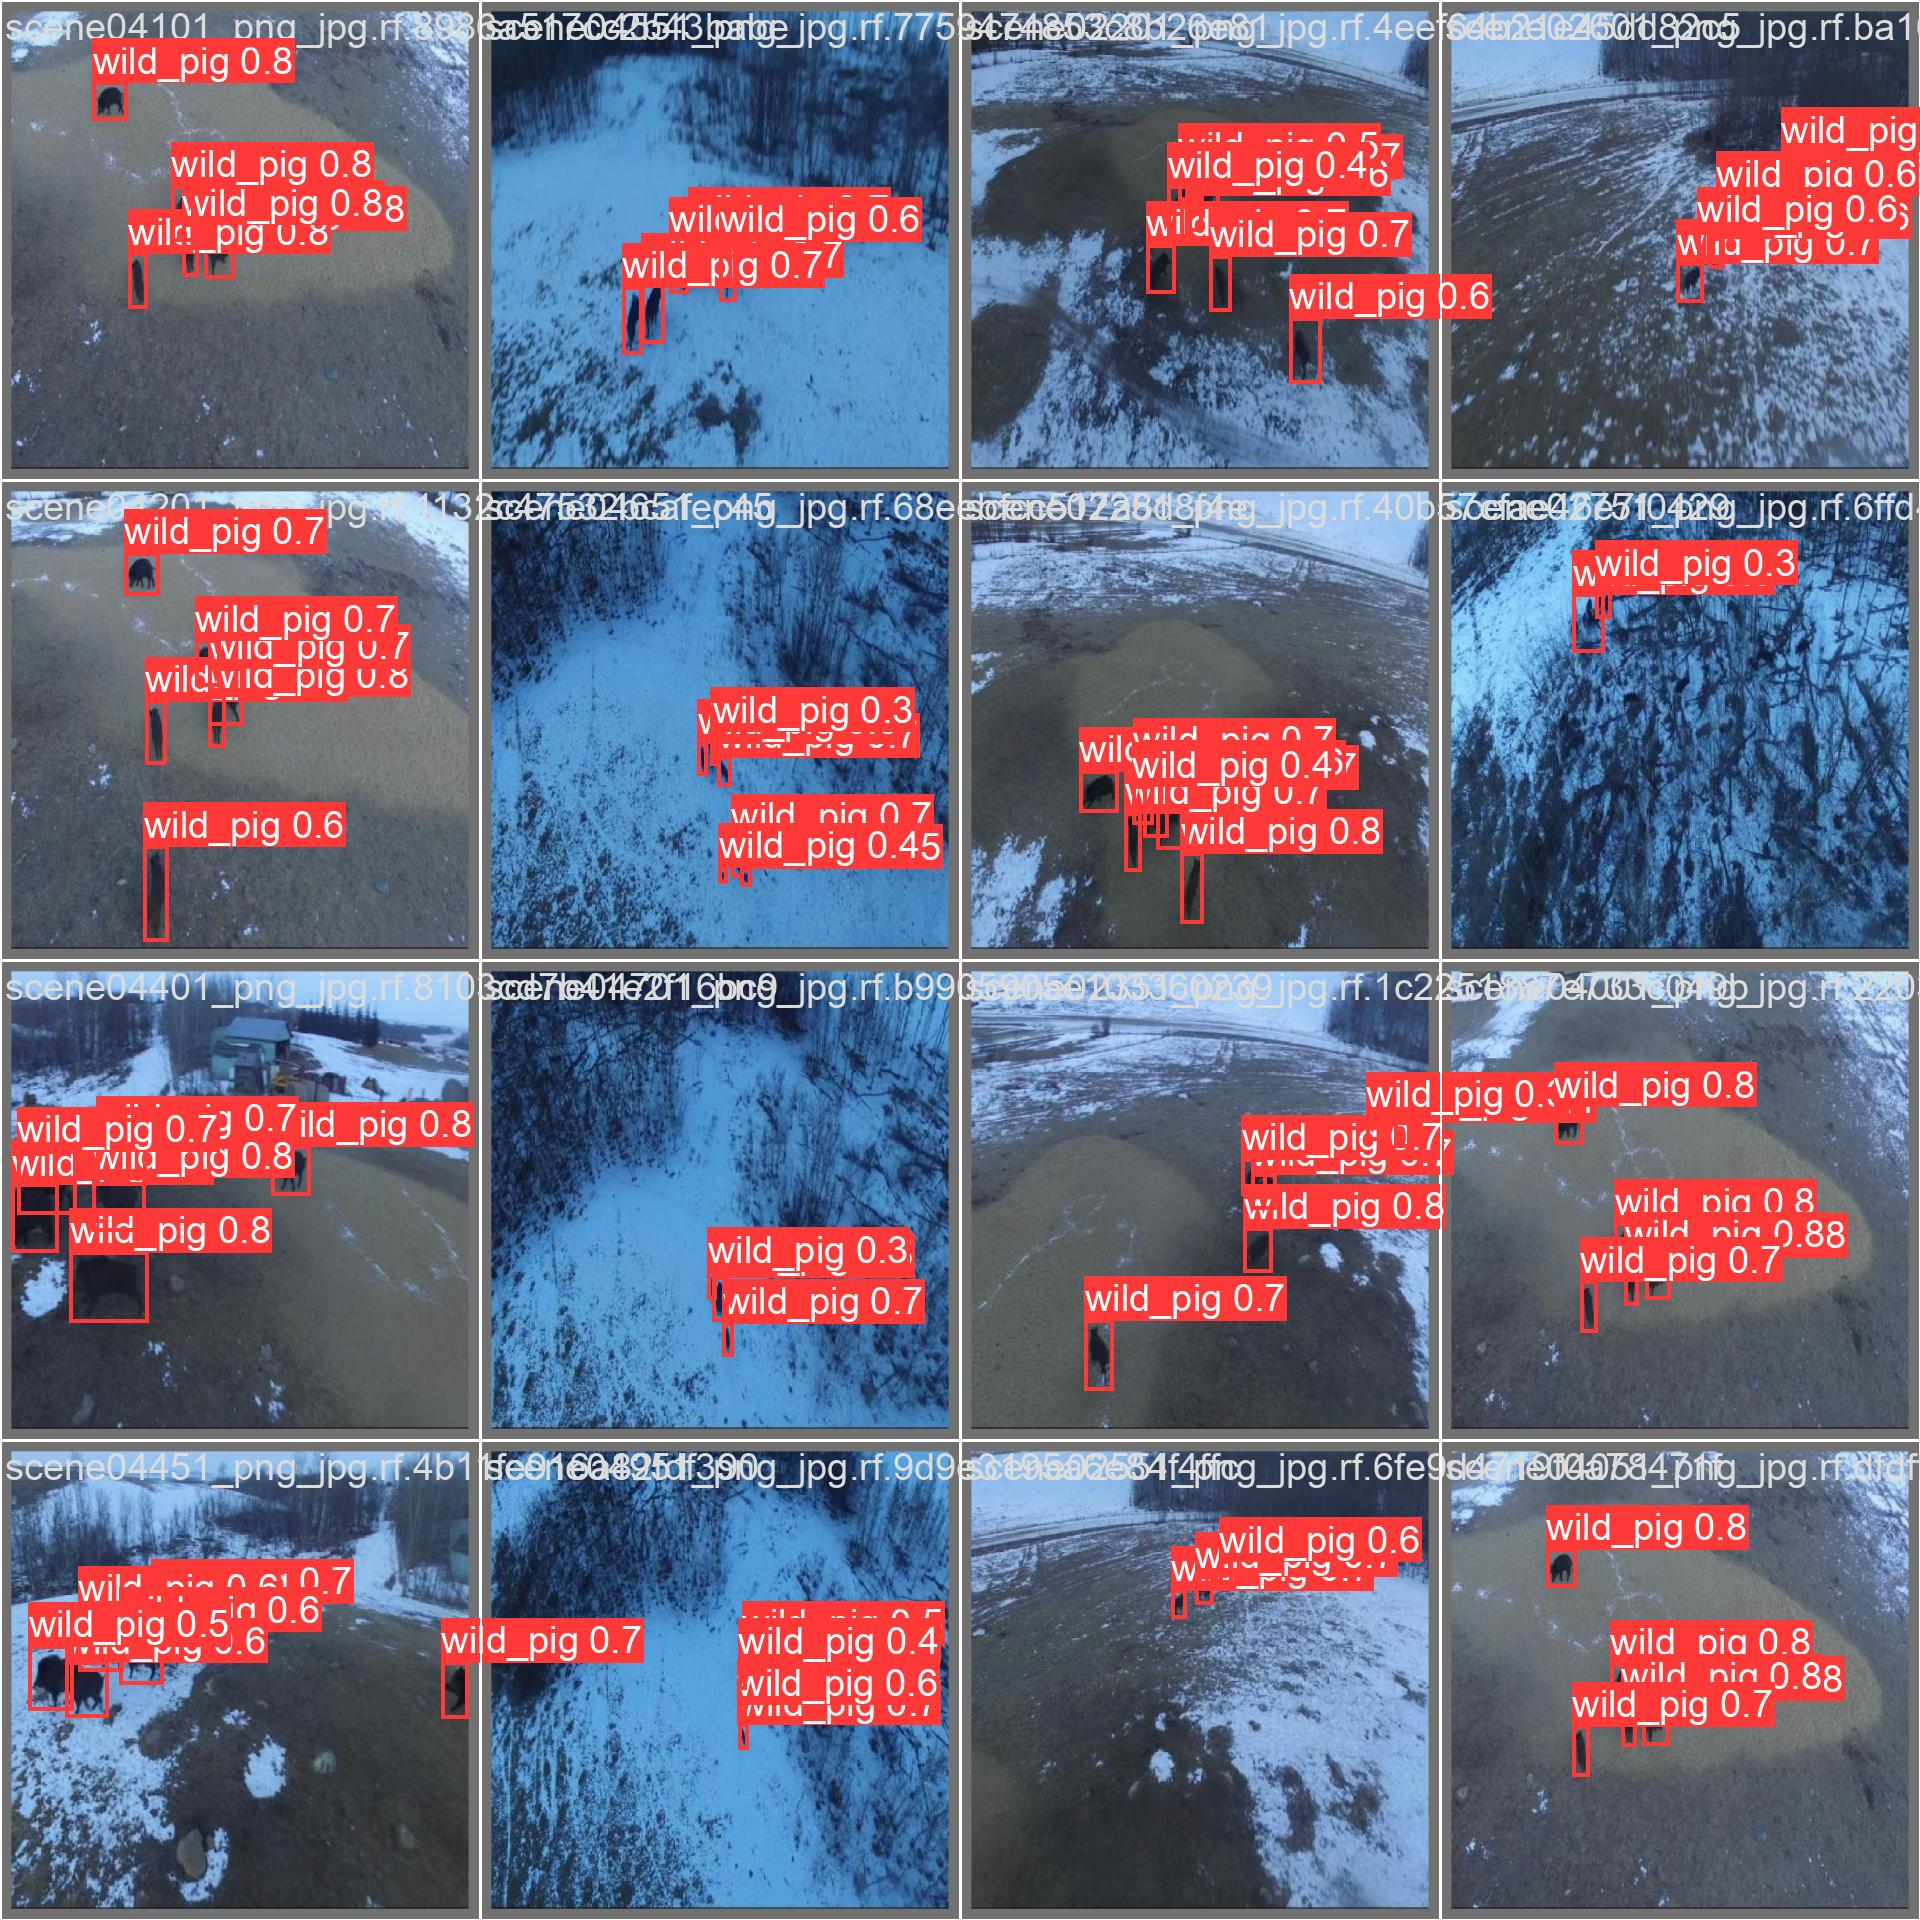

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/wild-pig-3/valid/labels.cache... 822 images, 68 backgrounds, 0 corrupt: 100% 822/822 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 16, len(boxes) = 1882. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 52/52 [00:24<00:00,  2.13it/s]
                   all        822       1882      0.835      0.828      0.883      0.584
Speed: 1.1ms preprocess, 20.6ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True
#!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/Boar_detection-1/Boar_detection-1/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/379 /content/datasets/wild-pig-3/test/images/-16_png_jpg.rf.2262b5e49761076a2d58804fb8be7362.jpg: 640x640 3 wild_pigs, 37.1ms
image 2/379 /content/datasets/wild-pig-3/test/images/-27_png_jpg.rf.5a7ec70f8444c796132d51b8fc205b24.jpg: 640x640 1 wild_pig, 37.1ms
image 3/379 /content/datasets/wild-pig-3/test/images/-5_png_jpg.rf.3bd25cb9fbacaeca64ffff1dd68f0f36.jpg: 640x640 6 wild_pigs, 37.0ms
image 4/379 /content/datasets/wild-pig-3/test/images/0-0_JPG_jpg.rf.37ef68c890f09485685367da78298771.jpg: 640x640 1 wild_pig, 37.0ms
image 5/379 /content/datasets/wild-pig-3/test/images/00000000000000000_PNG_jpg.rf.4f577cb9b3d6b475af3273701030691d.jpg: 640x640 4 wild_pigs, 37.0ms
image 6/379 /content/datasets/wild-pig-3/test/images/021_JPG_jpg.rf.0488af2f07162b064c36f204abcf0318.jpg: 640x640 1 wild_pig, 37.0ms
image 7

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## 🏆 Congratulations
